<a href="https://colab.research.google.com/github/AakilAhamed/AakilAhamed/blob/main/Auto_mpg_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aakilahamed","key":"7a0ae1f037c1cebfa8b32047bc06c7fb"}'}

In [3]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73027 sha256=824034e5420fb21a02e06c0a910de631a02cd17ae9a06475583f17bb327bfcbe
  Stored in directory: /root/.cache/pip/wheels/70/0c/e6/79103212a102e78b8453691b905f48000219574ba7137e7207
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.14
    Uninstalling kaggle-1.6.14:
      Successfully uninstalled kaggle-1.6.14


In [5]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!cp kaggle.json ~/.kaggle/


In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download uciml/autompg-dataset


  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 12.3MB/s]


In [9]:
!unzip autompg-dataset.zip


Archive:  autompg-dataset.zip
  inflating: auto-mpg.csv            


Exploratory Data Analysis on UCI Auto-mpg dataset

initial inspection on dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
print(data.info)

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1        

Data Cleaning

data cleaning

In [22]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
data = pd.read_csv('auto-mpg.csv')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

horsepower_data = data['horsepower'].values.reshape(-1, 1)

imputer.fit(horsepower_data)
horsepower_data = imputer.transform(horsepower_data)
data['horsepower'] = horsepower_data

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Outlier detection

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


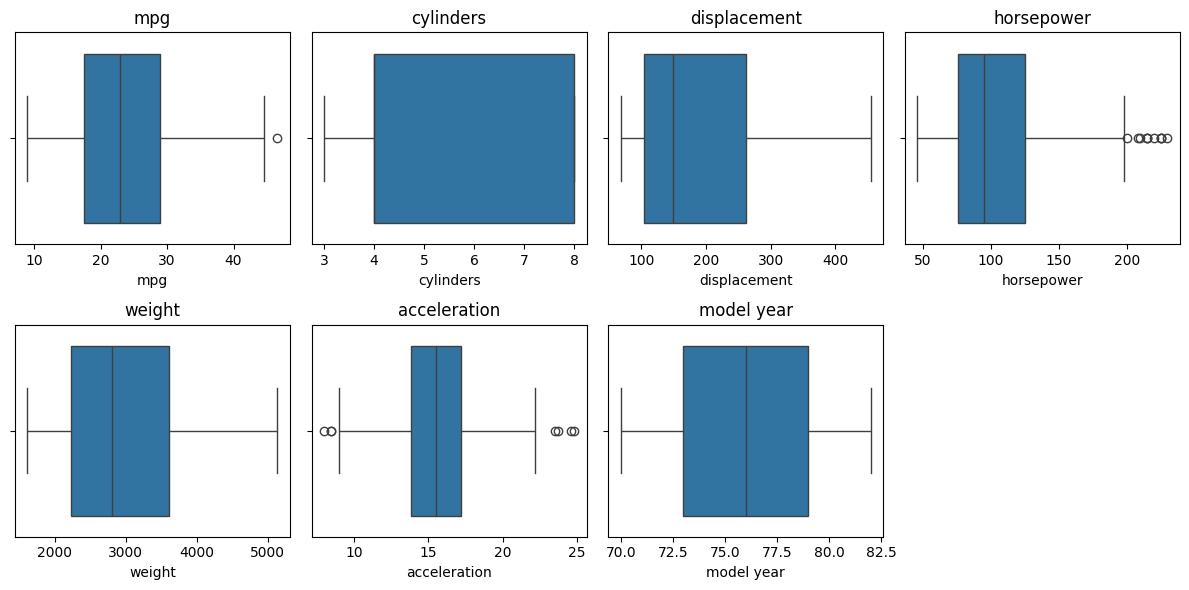

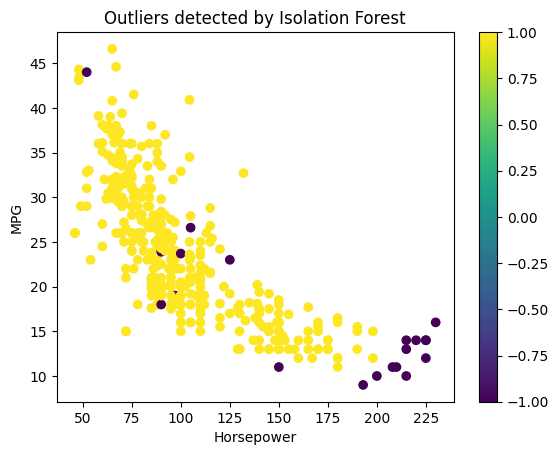

Outliers detected by Isolation Forest:
[  6   7   8  13  25  26  27  28  67  71  94  95 103 111 116 298 300 334
 364 394]


In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load your dataset (replace 'auto-mpg.csv' with your actual file)
data = pd.read_csv('auto-mpg.csv')

# Select numerical features for outlier detection
numerical_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# Handle missing values (replace '?' with NaN and impute)
data[numerical_features] = data[numerical_features].replace('?', np.nan)
data[numerical_features] = data[numerical_features].astype(float)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# --- Outlier Detection using Isolation Forest ---

model_iso = IsolationForest(contamination=0.05)  # Adjust contamination as needed
outliers_iso = model_iso.fit_predict(data[numerical_features])
data['outlier_iso'] = outliers_iso

# --- Visualization ---

# Box plots for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# Scatter plots for pairs of features (example)
plt.scatter(data['horsepower'], data['mpg'], c=data['outlier_iso'], cmap='viridis')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Outliers detected by Isolation Forest')
plt.colorbar()
plt.show()

# --- Print Outlier Indices ---

print("Outliers detected by Isolation Forest:")
print(np.where(data['outlier_iso'] == -1)[0])